In [1]:
import numpy as np
import pandas as pd
df=pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [2]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [3]:
#OUTLIERS
outlier={}
for col in df.select_dtypes(include=['float64','int64']).columns:
  Q1=df[col].quantile(0.5)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  outlier[col]=df[(df[col]<lower)|(df[col]>upper)].index.tolist()
  print(f"{col}:{len(outlier[col])}")

ID#:504
Balance:392
Qual_miles:226
cc1_miles:0
cc2_miles:43
cc3_miles:18
Bonus_miles:395
Bonus_trans:1577
Flight_miles_12mo:569
Flight_trans_12:565
Days_since_enroll:453
Award?:0


In [4]:
df_capped=df.copy()
for col in df_capped.select_dtypes(include=['float64','int64']).columns:
  Q1=df_capped[col].quantile(0.25)
  Q3=df_capped[col].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  df_capped[col]=np.where(df_capped[col]<lower,lower,np.where(df_capped[col]>upper,upper,df_capped[col]))

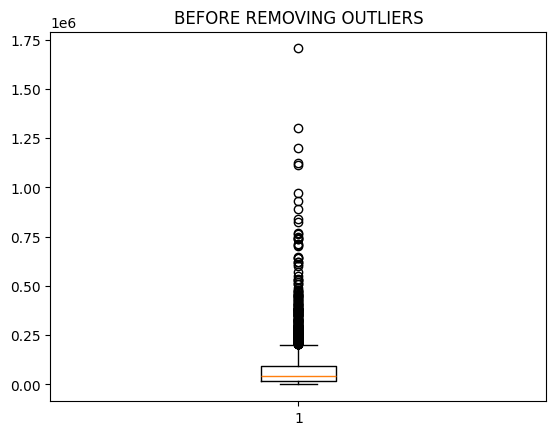

In [5]:
import matplotlib.pyplot as plt
plt.title("BEFORE REMOVING OUTLIERS")
plt.boxplot(df['Balance'])
plt.show()

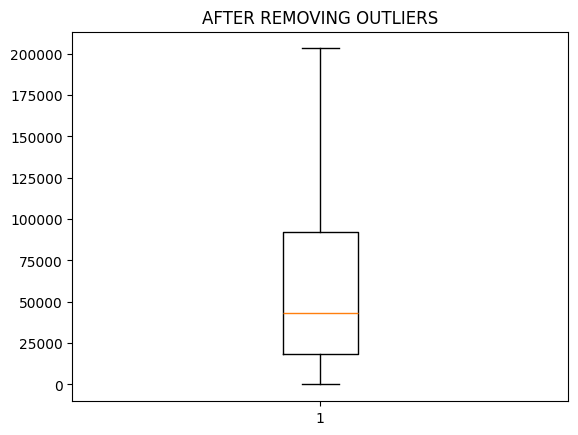

In [8]:
plt.title("AFTER REMOVING OUTLIERS")
plt.boxplot(df_capped['Balance'])
plt.show()

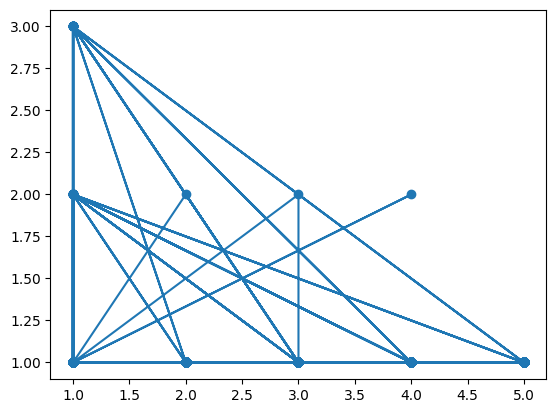

In [9]:
plt.scatter(df["cc1_miles"],df["cc2_miles"])
plt.plot(df["cc1_miles"],df["cc2_miles"])
plt.show()

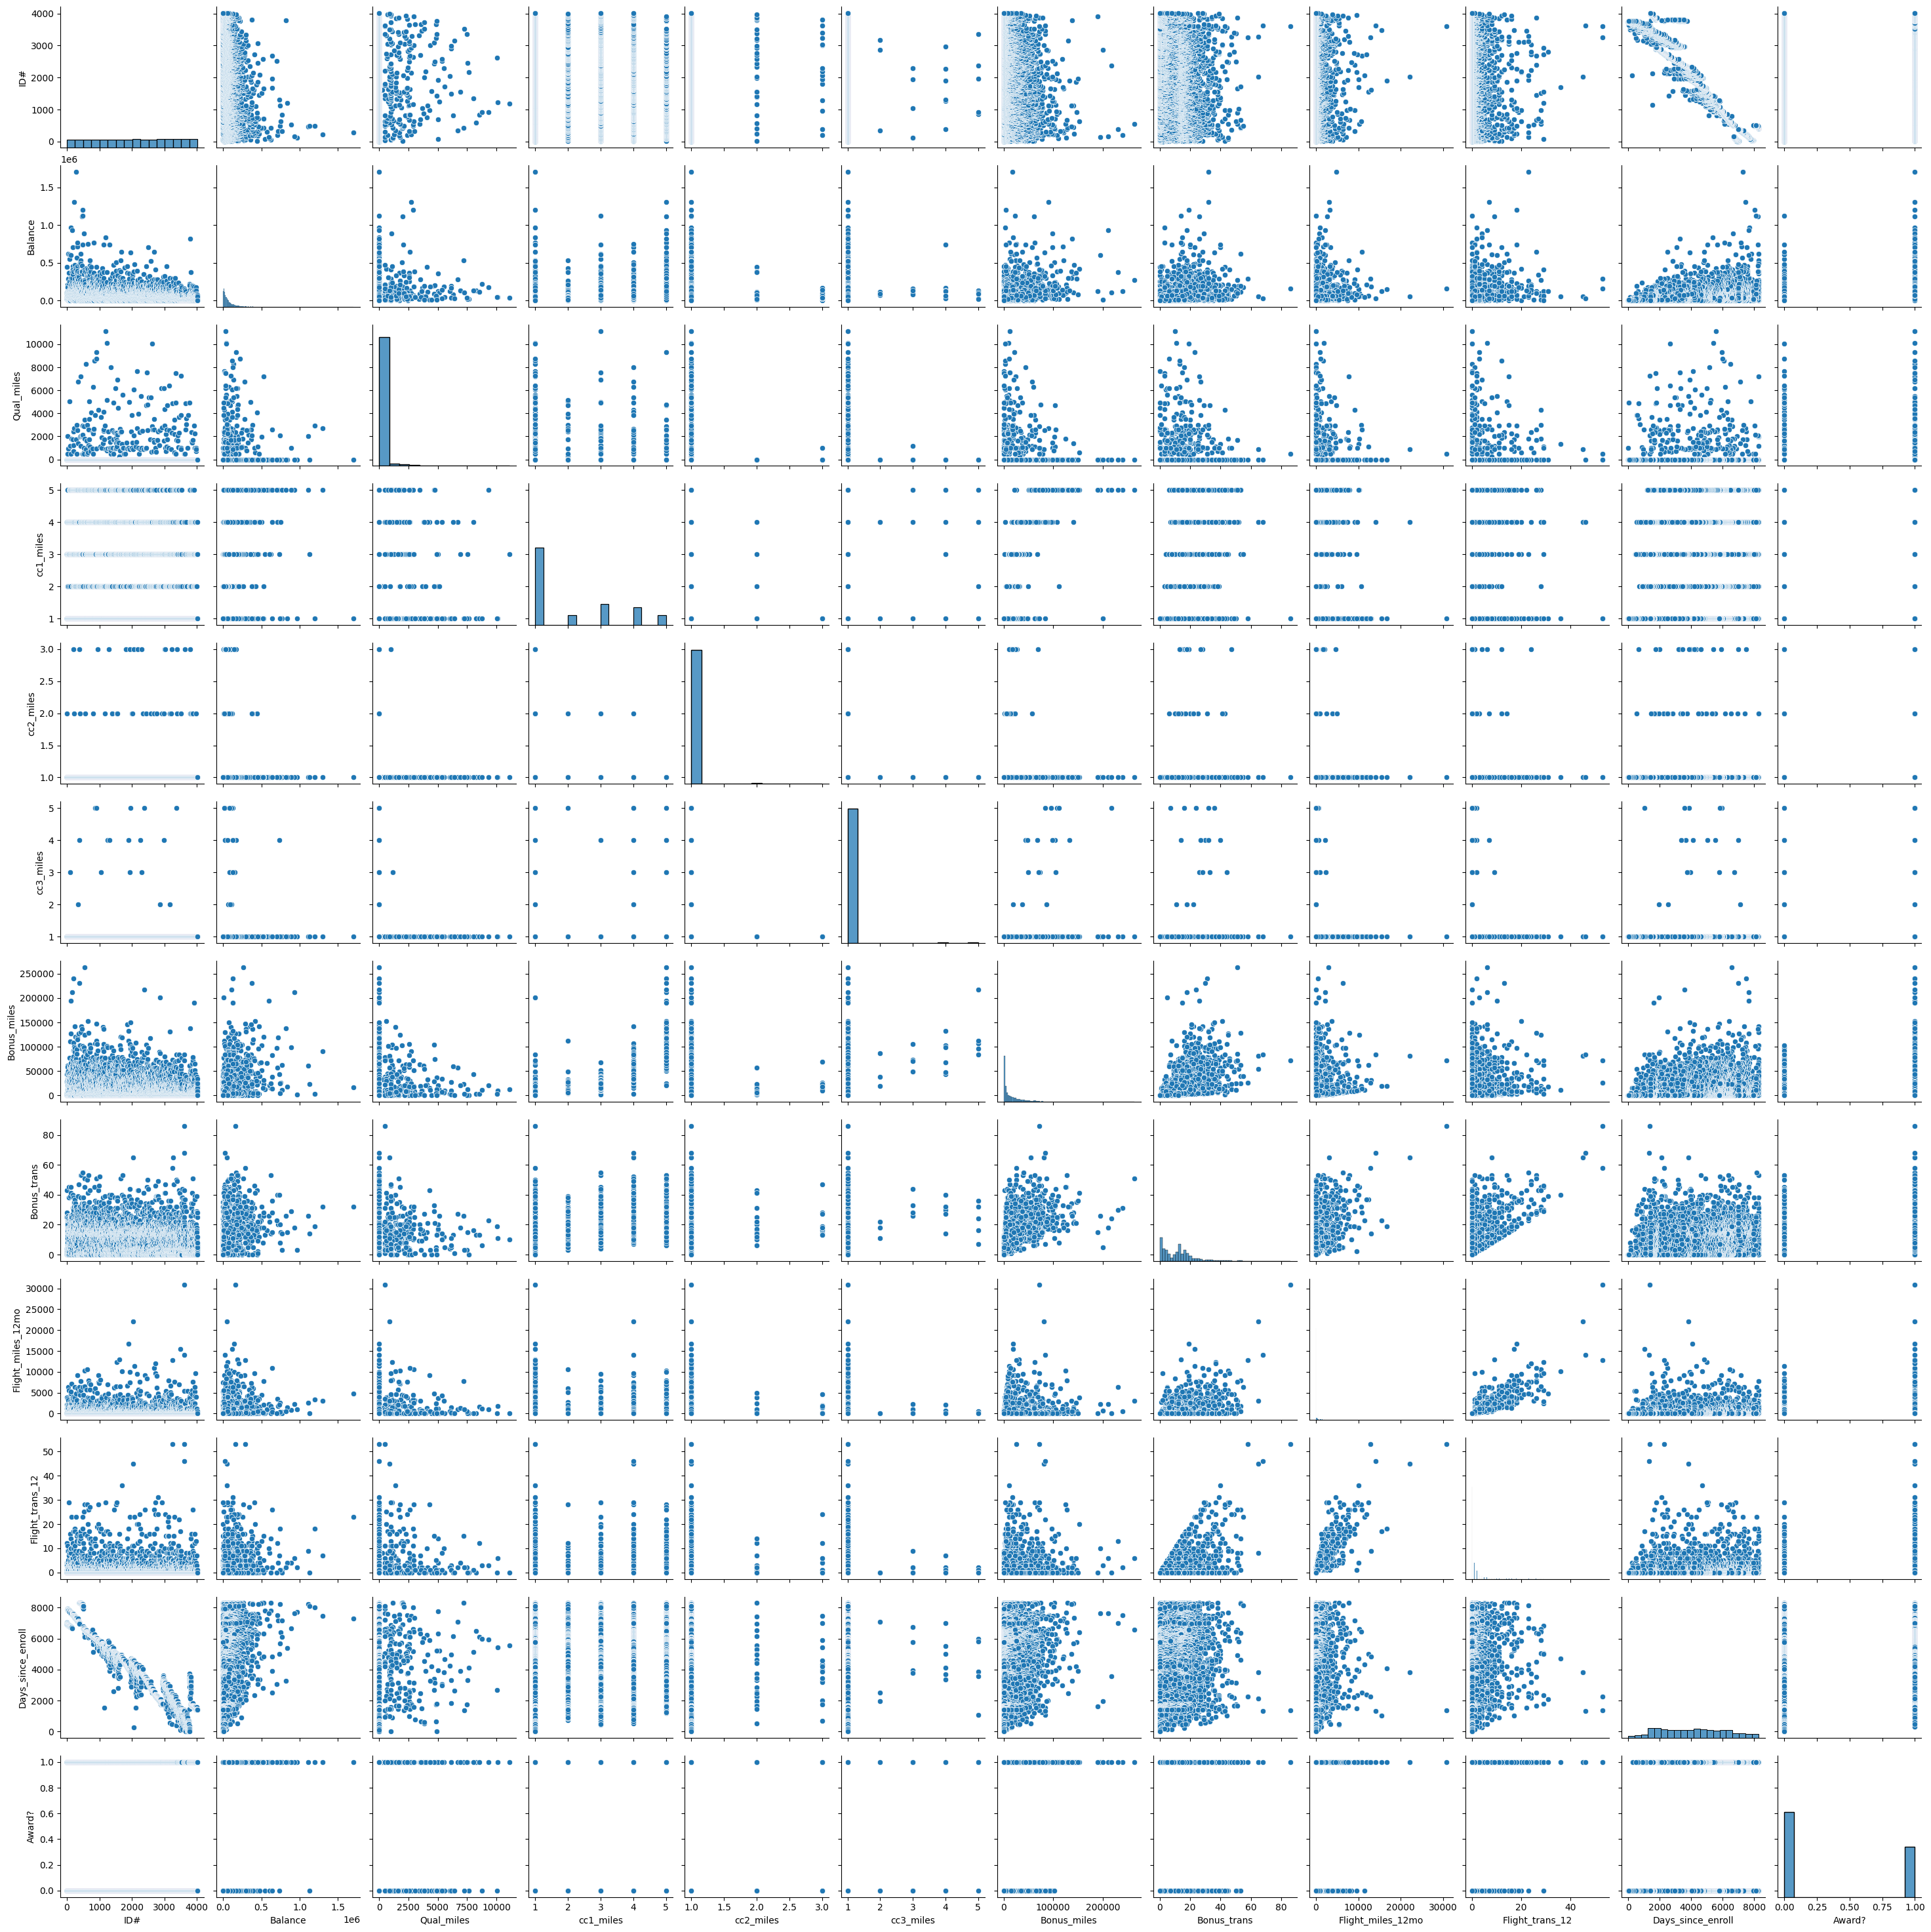

In [10]:
import seaborn as sns
sns.pairplot(data=df)

In [11]:
X=df[["Flight_miles_12mo","Bonus_miles"]]

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [14]:
from sklearn.cluster import KMeans

In [15]:
model=KMeans(n_clusters=3,random_state=32)
df["k-cluster"]=model.fit_predict(X_scaled)

In [16]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k-cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [17]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X_scaled,df["k-cluster"])
score


np.float64(0.6430262996214221)

In [19]:
score=[]
for i in range(2,11):
  model=KMeans(n_clusters=i,random_state=32)
  df["k-cluster"]=model.fit_predict(X_scaled)
  sc=silhouette_score(X_scaled,df["k-cluster"])
  score.append(sc)

In [20]:
score

[np.float64(0.6396523540382423),
 np.float64(0.6430262996214221),
 np.float64(0.6591797918765809),
 np.float64(0.6338686170594958),
 np.float64(0.5705962066762792),
 np.float64(0.5744004803145744),
 np.float64(0.5286676613500906),
 np.float64(0.5345686143111843),
 np.float64(0.565755695243365)]

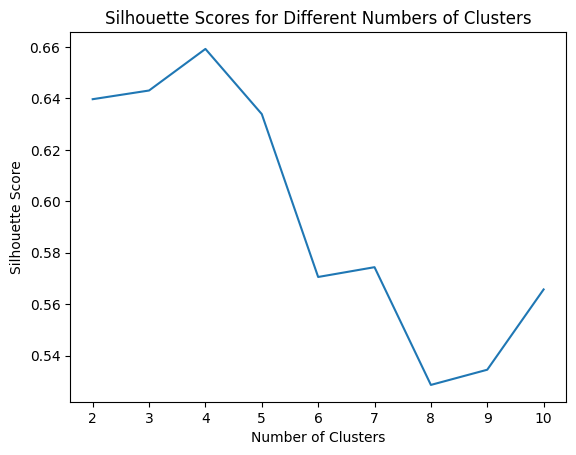

In [21]:
plt.plot(range(2, 11), score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
agm=AgglomerativeClustering(n_clusters=3,linkage="single")
df["Single"]=agm.fit_predict(X_scaled)

In [24]:
score=silhouette_score(X_scaled,df["Single"])
score

np.float64(0.9140030214207022)

In [25]:
agm=AgglomerativeClustering(n_clusters=3,linkage="complete")
df["Complete"]=agm.fit_predict(X_scaled)

In [26]:
score=silhouette_score(X_scaled,df["Complete"])
score

np.float64(0.8340941170473295)

In [27]:
agm=AgglomerativeClustering(n_clusters=3,linkage="ward")
df["Ward"]=agm.fit_predict(X_scaled)

In [29]:
score=silhouette_score(X_scaled,df["Ward"])
score

np.float64(0.6616182673436071)

In [30]:
s_score=[]
for i in range (2,11):
  agm=AgglomerativeClustering(n_clusters=i,linkage="single")
  df["Single"]=agm.fit_predict(X_scaled)
  sc=silhouette_score(X_scaled,df["Single"])
  s_score.append(sc)

In [31]:
s_score

[np.float64(0.9387607186561284),
 np.float64(0.9140030214207022),
 np.float64(0.8597937501336071),
 np.float64(0.8598816398437776),
 np.float64(0.8573187568857351),
 np.float64(0.828805739656958),
 np.float64(0.8224770662876426),
 np.float64(0.8227893954553055),
 np.float64(0.8064677596487517)]

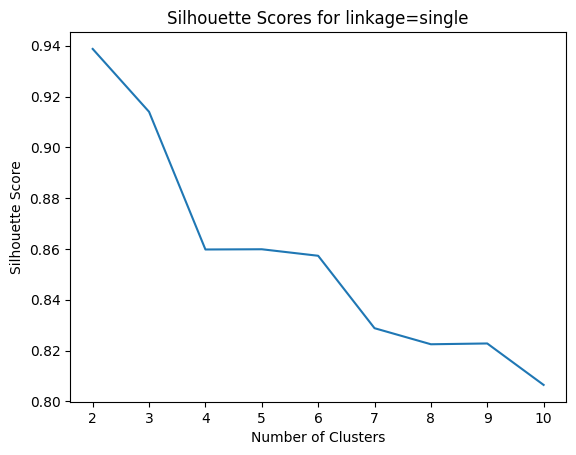

In [33]:
plt.plot(range(2, 11), s_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for linkage=single")
plt.show()

In [35]:
c_score=[]
for i in range (2,11):
  agm=AgglomerativeClustering(n_clusters=i,linkage="complete")
  df["Complete"]=agm.fit_predict(X_scaled)
  sc=silhouette_score(X_scaled,df["Complete"])
  c_score.append(sc)

In [37]:
c_score

[np.float64(0.9290115790120502),
 np.float64(0.8340941170473295),
 np.float64(0.8280758548332942),
 np.float64(0.6821683719633185),
 np.float64(0.6793327099827141),
 np.float64(0.6828044812701013),
 np.float64(0.6827021378241813),
 np.float64(0.6824759036180239),
 np.float64(0.6819774342306906)]

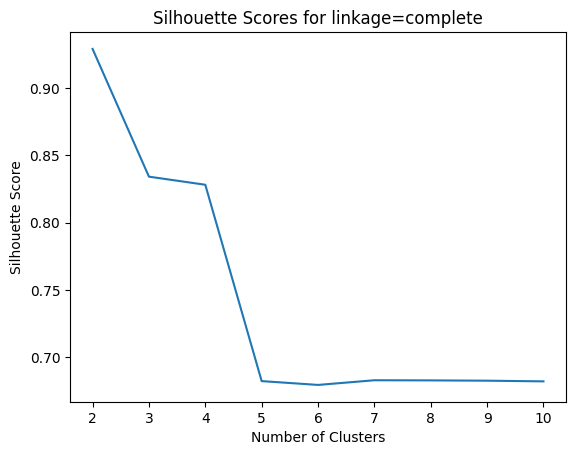

In [40]:
plt.plot(range(2, 11), c_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for linkage=complete")
plt.show()

In [39]:
w_score=[]
for i in range (2,11):
  agm=AgglomerativeClustering(n_clusters=i,linkage="ward")
  df["Ward"]=agm.fit_predict(X_scaled)
  sc=silhouette_score(X_scaled,df["Ward"])
  w_score.append(sc)

In [42]:
w_score

[np.float64(0.6521350550675493),
 np.float64(0.6616182673436071),
 np.float64(0.6373345469865928),
 np.float64(0.5275824799023289),
 np.float64(0.5210890834723517),
 np.float64(0.5222153695723882),
 np.float64(0.49606764372103457),
 np.float64(0.49865248414027963),
 np.float64(0.5018920177340238)]

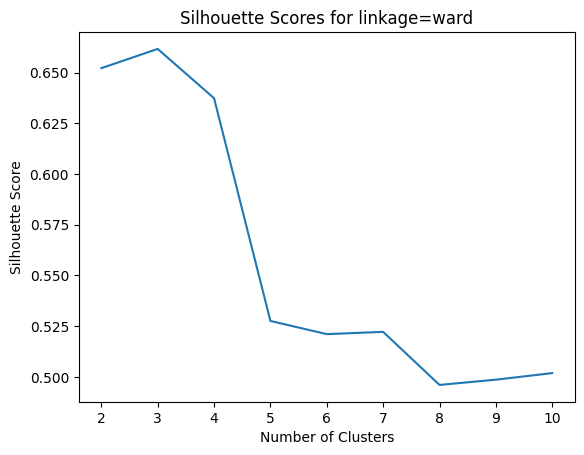

In [43]:
plt.plot(range(2, 11), w_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for linkage=ward")
plt.show()

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
db=DBSCAN(eps=0.5,min_samples=5)
df["DBSCAN"]=db.fit_predict(X_scaled)

In [46]:
score=silhouette_score(X_scaled,df["DBSCAN"])
score

np.float64(0.6807043402683581)

In [47]:
df["DBSCAN"].value_counts()

,count
DBSCAN,
0,3940
-1,48
1,6
2,5


In [48]:
#CONCLUSION
#K-Means k=4 score=65
#Agglomerative clustering(Linkage=single) k=2 score=93
#Agglomerative clustering(Linkage=complete) k=2 score=92
#Agglomerative clustering(Linkage=word) k=2 score=66
#DBSCAN=score=68

In [49]:
#HENCE AGGLOMERATIVE CLUSTERING(LINKAGE=SINGLE) IS SUITABLE FOR THESE DATASET BEACUSE BY USING THE METHOD ONLY WE GOT HIGHEST SCORE.